# Problem Statement
# You own the mall and want to understand the customers who can quickly  converge [Target Customers] so that the insight can be given to themarketing team and plan the strategy accordingly.
# Perform the below Tasks to complete the assignment:-
## Clustering the data and performing classification algorithms
# 1. Download the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load the dataset into the tool.

In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations.
# ∙ Univariate Analysis


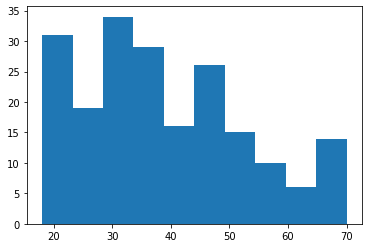

In [7]:
#Age
plt.hist(data['Age'])
plt.show()

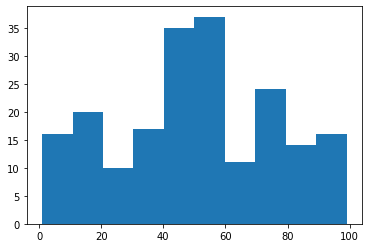

In [6]:
#Spending Score
plt.hist(data['Spending Score (1-100)'])
plt.show()

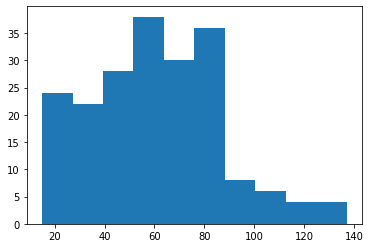

In [8]:
#Annual Income
plt.hist(data['Annual Income (k$)'])
plt.show()

# .Bivariate Analysis

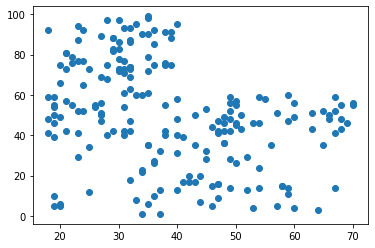

In [9]:
#Age vs Spending Score
plt.scatter(data['Age'],data['Spending Score (1-100)'])
plt.show()

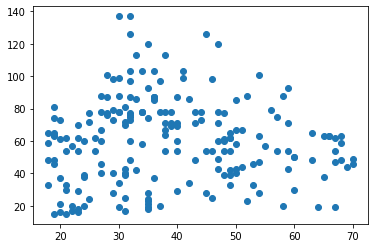

In [10]:
#Age vs Annual Income
plt.scatter(data['Age'],data['Annual Income (k$)'])
plt.show()

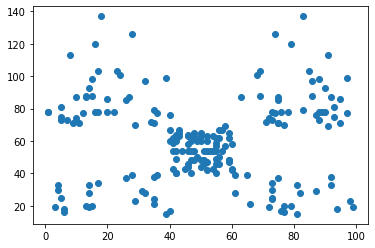

In [11]:
#Spending Score vs Annual Income
plt.scatter(data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.show()

# .Multivariate Analysis

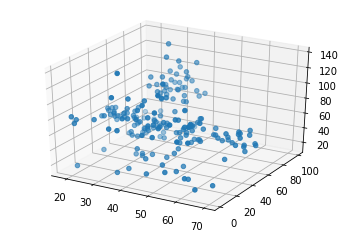

In [12]:
#Age vs Spending Score vs Annual Income
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(data['Age'],data['Spending Score (1-100)'],data['Annual Income (k$)'])
plt.show()

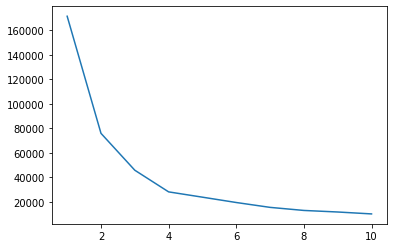

In [13]:
#K-Means Clustering
#Age vs Spending Score
X=data.iloc[:,[2,4]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.show()

# 4. Perform descriptive statistics on the dataset.


In [14]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


# 5. Check for Missing values and deal with them.

In [16]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# 6. Find the outliers and replace them outliers.

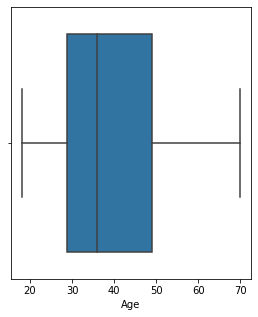

In [17]:
fig,ax=plt.subplots(figsize=(25,5))
plt.subplot(1, 5, 2)
sns.boxplot(x=data['Age'])

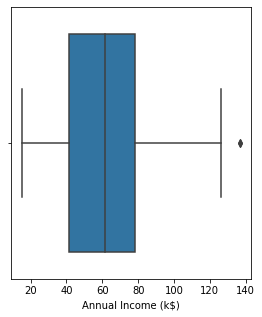

In [18]:
fig,ax=plt.subplots(figsize=(25,5))
plt.subplot(1, 5, 3)
sns.boxplot(x=data['Annual Income (k$)'])

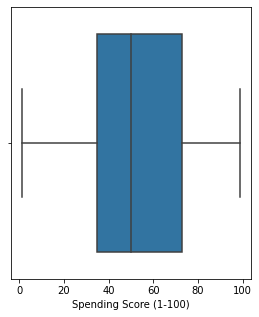

In [19]:
fig,ax=plt.subplots(figsize=(25,5))
plt.subplot(1, 5, 4)
sns.boxplot(x=data['Spending Score (1-100)'])

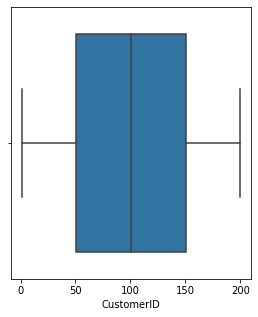

In [20]:
fig,ax=plt.subplots(figsize=(25,5))
plt.subplot(1, 5, 1)
sns.boxplot(x=data['CustomerID'])

# 6. Find the outliers and replace them outliers

In [21]:
quant=data.quantile(q=[0.25,0.75])
quant

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.25,50.75,28.75,41.5,34.75
0.75,150.25,49.00,78.0,73.00


In [22]:
quant.loc[0.75]

CustomerID                150.25
Age                        49.00
Annual Income (k$)         78.00
Spending Score (1-100)     73.00
Name: 0.75, dtype: float64

In [23]:
quant.loc[0.25]

CustomerID                50.75
Age                       28.75
Annual Income (k$)        41.50
Spending Score (1-100)    34.75
Name: 0.25, dtype: float64

In [24]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [64]:
low=quant.loc[0.25]-(1.5 *iqr)
low

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

In [26]:
up=quant.loc[0.75]+(1.5 *iqr)
up

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [27]:
data['Annual Income (k$)']= np.where(data['Annual Income (k$)']>132,60,data['Annual Income (k$)'])

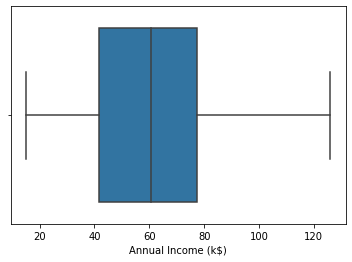

In [28]:
sns.boxplot(x=data['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [29]:
data.select_dtypes(include='object').columns

Index(['Gender'], dtype='object')

In [31]:
#Perform encoding for gender column

data=pd.get_dummies(data,columns=['Gender'])
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


# 8. Scaling the data

In [33]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [34]:
df=sc.fit_transform(data.iloc[:,1:])

In [35]:
df

array([[0.01923077, 0.        , 0.3877551 , 0.        , 1.        ],
       [0.05769231, 0.        , 0.81632653, 0.        , 1.        ],
       [0.03846154, 0.00900901, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.00900901, 0.7755102 , 1.        , 0.        ],
       [0.25      , 0.01801802, 0.39795918, 1.        , 0.        ],
       [0.07692308, 0.01801802, 0.76530612, 1.        , 0.        ],
       [0.32692308, 0.02702703, 0.05102041, 1.        , 0.        ],
       [0.09615385, 0.02702703, 0.94897959, 1.        , 0.        ],
       [0.88461538, 0.03603604, 0.02040816, 0.        , 1.        ],
       [0.23076923, 0.03603604, 0.7244898 , 1.        , 0.        ],
       [0.94230769, 0.03603604, 0.13265306, 0.        , 1.        ],
       [0.32692308, 0.03603604, 1.        , 1.        , 0.        ],
       [0.76923077, 0.04504505, 0.14285714, 1.        , 0.        ],
       [0.11538462, 0.04504505, 0.7755102 , 1.        , 0.        ],
       [0.36538462, 0.04504505, 0.

# 9. Perform any of the clustering algorithms.
# Kmeans_clustering

In [36]:
from sklearn.cluster import KMeans

In [37]:
TWSS=[]
k=list(range(2,9))

for i in k:
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [38]:
TWSS

[381599.71057105705,
 268143.7087854999,
 191678.8876388013,
 153633.18920933554,
 119294.50026693409,
 101355.22492784992,
 85831.87039471368]

Text(0, 0.5, 'TWSS')

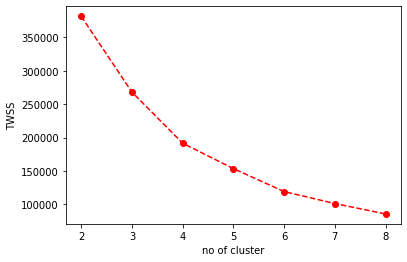

In [39]:
plt.plot(k,TWSS,'ro--')
plt.xlabel('no of cluster')
plt.ylabel('TWSS')

In [40]:
#selecting  4 clusters

model=KMeans(n_clusters=4)

model.fit(data)

KMeans(n_clusters=4)

In [41]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [42]:
mb=pd.Series(model.labels_)

In [43]:
data.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0


# 10. Add the cluster data with the primary dataset


In [50]:
data['clust']=mb

In [51]:
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster,clust
0,1,19,15,39,0,1,7,1
1,2,21,15,81,0,1,3,1
2,3,20,16,6,1,0,7,1
3,4,23,16,77,1,0,3,1
4,5,31,17,40,1,0,7,1


In [52]:
data.tail()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster,clust
195,196,35,120,79,1,0,2,0
196,197,45,126,28,1,0,6,2
197,198,32,126,74,0,1,2,0
198,199,32,60,18,0,1,6,2
199,200,30,60,83,0,1,2,0


# 11. Split the data into dependent and independent variables

In [53]:
#dependent
y= data['clust']
y

0      1
1      1
2      1
3      1
4      1
      ..
195    0
196    2
197    0
198    2
199    0
Name: clust, Length: 200, dtype: int32

In [54]:
#independent
x= data.drop(columns=['CustomerID','clust'],axis=1)
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
0,19,15,39,0,1,7
1,21,15,81,0,1,3
2,20,16,6,1,0,7
3,23,16,77,1,0,3
4,31,17,40,1,0,7


In [55]:
x.tail()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,Cluster
195,35,120,79,1,0,2
196,45,126,28,1,0,6
197,32,126,74,0,1,2
198,32,60,18,0,1,6
199,30,60,83,0,1,2


# 12. Split the data into training and testing

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# 13. Build the Model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf=RandomForestClassifier()

# 14. Train the Model

In [60]:
rf.fit(x_train,y_train)

RandomForestClassifier()

# 15. Test the Model

In [61]:
#prediction
pred=rf.predict(x_test)

# 16. Measure the performance using Evaluvation Metrics

In [62]:
# Accuracy of DI model
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.975

In [63]:
#confusion matrix
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[10,  0,  0,  0],
       [ 0, 13,  0,  0],
       [ 0,  0,  8,  0],
       [ 0,  1,  0,  8]])